# 01 Image Preprocessing - PART 03 - PREPARATION

### Imports

In [3]:
import os
import gc
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from sys import getsizeof
from tensorflow import keras

### Mode of running

In [96]:
TEST_MODE = False

### Paths

In [97]:
BASE_PATH = './data'
ORIGINAL_IMAGES = f'{BASE_PATH}/unsplit'
IMAGE_PICKLES = f'{BASE_PATH}/pickles'
IMAGE_NPYS = f'{BASE_PATH}/npys'

In [98]:
CATEGORIES = os.listdir(ORIGINAL_IMAGES) # list the names of the categories that in my data
print(str(len(CATEGORIES)),'CATEGORIES are ', CATEGORIES)

8 CATEGORIES are  ['Black_Hooded_Oriole', 'Common_Myna', 'Indian_Peafowl', 'Intermediate_Egret', 'Other', 'Red_Faced_Malkoha', 'Rose_Ringed_Parakeet', 'White_Throated_Kingfisher']


### Reading the augmented images

In [114]:
def read_images():
    dataset = []
    X = []
    y = []
    
    for category in CATEGORIES:
        cat_path = os.path.join(ORIGINAL_IMAGES, category)
        cat_num = CATEGORIES.index(category)
        print(f'Reading from category: {cat_num} - {category}')
        for img_filename in os.listdir(cat_path):
            img = cv2.imread(os.path.join(cat_path, img_filename))[...,::-1]  # read & convert from BGR to RGB
            X.append(img)
#         print(len(y))
        y.extend(np.ones(len(os.listdir(cat_path)))*cat_num)
#         print(len(y))
        if TEST_MODE and cat_num == 2:
            break # - then will only take the images from the first category
            
    return [np.asarray(X), np.transpose(np.asarray(y).astype(int))]

In [115]:
dataset = read_images()

Reading from category: 0 - Black_Hooded_Oriole
Reading from category: 1 - Common_Myna
Reading from category: 2 - Indian_Peafowl
Reading from category: 3 - Intermediate_Egret
Reading from category: 4 - Other
Reading from category: 5 - Red_Faced_Malkoha
Reading from category: 6 - Rose_Ringed_Parakeet
Reading from category: 7 - White_Throated_Kingfisher


In [116]:
len(dataset)

2

In [117]:
dataset[0].shape, dataset[1].shape

((2836, 320, 400, 3), (2836,))

Indian_Peafowl


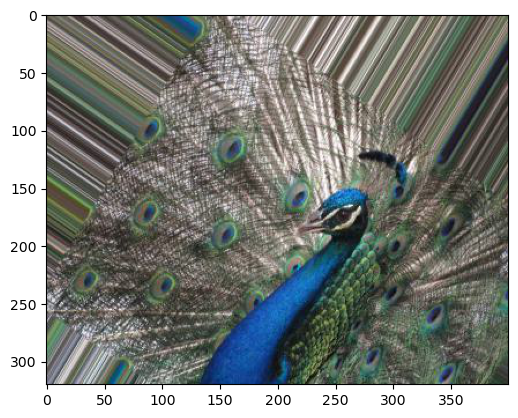

In [118]:
test_index = 982
plt.imshow(dataset[0][test_index])
print(CATEGORIES[dataset[1][test_index]])

In [119]:
# Image pickle save and load functions

def save_pickle(obj, filename):
    with open(os.path.join(IMAGE_PICKLES, f'{filename}.pkl'), 'wb') as f:  # open a text file
        pickle.dump(obj, f) # serialize the list
    
def load_pickle(filename):
    with open(os.path.join(IMAGE_PICKLES, f'{filename}.pkl'), 'rb') as f:
        return pickle.load(f) # deserialize using load()  

In [120]:
def save_npy(obj, filename):
    np.save(os.path.join(IMAGE_NPYS, f'{filename}.npy'), batch)
    
def load_npy(filename):
    return np.load(os.path.join(IMAGE_NPYS, f'{filename}.npy'))

In [121]:
save_pickle(dataset, 'dataset')

In [122]:
loaded_ds = load_pickle('dataset')

In [123]:
loaded_ds[0].shape, loaded_ds[1].shape

((2836, 320, 400, 3), (2836,))